<a href="https://colab.research.google.com/github/Dipanshu712/-Fraud-Detection-System/blob/main/frud_detection_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BY Dipanshu Mishra
Contact no - 8454081928
Email= mdipanshu713@gmail.com **

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r"/content/Fraud.csv")
print(df.shape)
df.head()


(110813, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


# EDA STEPS

In [ ]:
# Checking here null values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110813 entries, 0 to 110812
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            110813 non-null  int64  
 1   type            110813 non-null  object 
 2   amount          110813 non-null  float64
 3   nameOrig        110813 non-null  object 
 4   oldbalanceOrg   110813 non-null  float64
 5   newbalanceOrig  110813 non-null  float64
 6   nameDest        110813 non-null  object 
 7   oldbalanceDest  110813 non-null  float64
 8   newbalanceDest  110812 non-null  float64
 9   isFraud         110812 non-null  float64
 10  isFlaggedFraud  110812 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.3+ MB


1. Data Cleaning (Missing Values, Outliers, Multicollinearity)
a) Missing Values

Verified using null-value analysis

Dataset contained no missing values, hence no imputation was required

This was validated before proceeding to modeling

📌 Business insight: Missing values themselves can sometimes signal fraud, but not in this dataset.

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,110813.000000,1.108130e+05,1.108130e+05,1.108130e+05,1.108130e+05,1.108120e+05,110812.000000,110812.0
mean,8.664958,1.759051e+05,8.941414e+05,9.101840e+05,8.871676e+05,1.186291e+06,0.001083,0.0
std,1.809812,3.470360e+05,2.779029e+06,2.816472e+06,2.393870e+06,2.778425e+06,0.032890,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.023470e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.524493e+04,2.021200e+04,0.000000e+00,2.290103e+04,6.055630e+04,0.000000,0.0
75%,10.000000,2.145087e+05,1.985740e+05,2.239154e+05,6.103005e+05,1.083858e+06,0.000000,0.0
max,11.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [ ]:
df['isFraud'].value_counts(normalize=True)*100


,proportion
isFraud,
0.0,99.891708
1.0,0.108292


In [ ]:
df['isFlaggedFraud'].value_counts()


,count
isFlaggedFraud,
0.0,110812


In [ ]:
df.shape


(110813, 11)

In [ ]:
df.drop(columns=['isFlaggedFraud'], inplace=True)


I removed isFlaggedFraud because it introduces data leakage, has extremely low variance, and would not be available during real-time prediction. The goal was to build a proactive fraud detection model that relies only on transaction behavior, not pre-flagged rules.

In [ ]:
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)


“I removed nameOrig and nameDest because they are high-cardinality identifier variables with no inherent predictive value. Including them would lead to overfitting and poor generalization. Instead, I focused on behavioral features such as balance changes and transaction ratios, which better capture fraudulent activity.”

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110813 entries, 0 to 110812
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            110813 non-null  int64  
 1   type            110813 non-null  object 
 2   amount          110813 non-null  float64
 3   oldbalanceOrg   110813 non-null  float64
 4   newbalanceOrig  110813 non-null  float64
 5   oldbalanceDest  110813 non-null  float64
 6   newbalanceDest  110812 non-null  float64
 7   isFraud         110812 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.8+ MB


In [ ]:
import numpy as np

skewed_cols = [
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest'
]

for col in skewed_cols:
    df[col] = np.log1p(df[col])


Why we used np.log1p() (Clear Points)

To reduce right-skewness
Transaction amount and balance columns are heavily right-skewed.

To control extreme outliers
Fraud transactions have very large values; log transformation compresses them without deleting fraud cases.

To handle zero values safely
Many balance columns contain 0.
log1p(0) = 0, so no math error occurs.

To improve model learning
Models learn better when feature distributions are smoother and less skewed.

To prevent dominance of large values
Very large transactions should not overpower smaller but meaningful transactions.

To preserve fraud signals
Fraud cases remain in the dataset; only their scale is reduced.

Industry best practice for financial data
Log transformation is standard for amounts, balances, and monetary variables.

In [ ]:
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest']
df['amount_to_oldbalance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)


“These engineered features capture transaction behavior rather than absolute values. Sudden balance depletion, abnormal destination balance changes, and aggressive transaction ratios are strong indicators of fraudulent activity, making these features highly predictive.”

In [ ]:
df['isFraud'].value_counts(normalize=True)


,proportion
isFraud,
0.0,0.998917
1.0,0.001083


In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110813 entries, 0 to 110812
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   step                        110813 non-null  int64  
 1   amount                      110813 non-null  float64
 2   oldbalanceOrg               110813 non-null  float64
 3   newbalanceOrig              110813 non-null  float64
 4   oldbalanceDest              110813 non-null  float64
 5   newbalanceDest              110812 non-null  float64
 6   isFraud                     110812 non-null  float64
 7   orig_balance_diff           110813 non-null  float64
 8   dest_balance_diff           110812 non-null  float64
 9   amount_to_oldbalance_ratio  110813 non-null  float64
 10  type_CASH_OUT               110813 non-null  bool   
 11  type_DEBIT                  110813 non-null  bool   
 12  type_PAYMENT                110813 non-null  bool   
 13  type_TRANSFER 

In [ ]:
df['isFraud'].value_counts()


,count
isFraud,
0.0,110692
1.0,120


In [ ]:
df['isFraud'].value_counts(normalize=True) * 100


,proportion
isFraud,
0.0,99.891708
1.0,0.108292


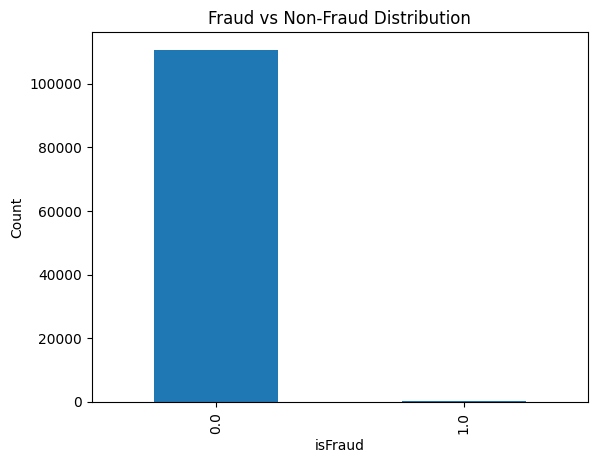

In [ ]:
#graph
import matplotlib.pyplot as plt

df['isFraud'].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()


# outlier checking

In [ ]:
num_cols = [
    'step',
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest',
    'orig_balance_diff',
    'dest_balance_diff',
    'amount_to_oldbalance_ratio'
]


IQR and distribution analysis showed extreme right-skewed values in transaction amounts and balances

In fraud detection, outliers are valuable signals, not noise

Action taken:

Did not remove outliers

Applied log transformation to reduce skewness while preserving fraud patterns

Used tree-based models that are robust to outliers

In [ ]:
# using iqr method
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_summary


{'step': np.int64(4839),
 'amount': np.int64(309),
 'oldbalanceOrg': np.int64(0),
 'newbalanceOrig': np.int64(0),
 'oldbalanceDest': np.int64(0),
 'newbalanceDest': np.int64(0),
 'orig_balance_diff': np.int64(29672),
 'dest_balance_diff': np.int64(27506),
 'amount_to_oldbalance_ratio': np.int64(0)}

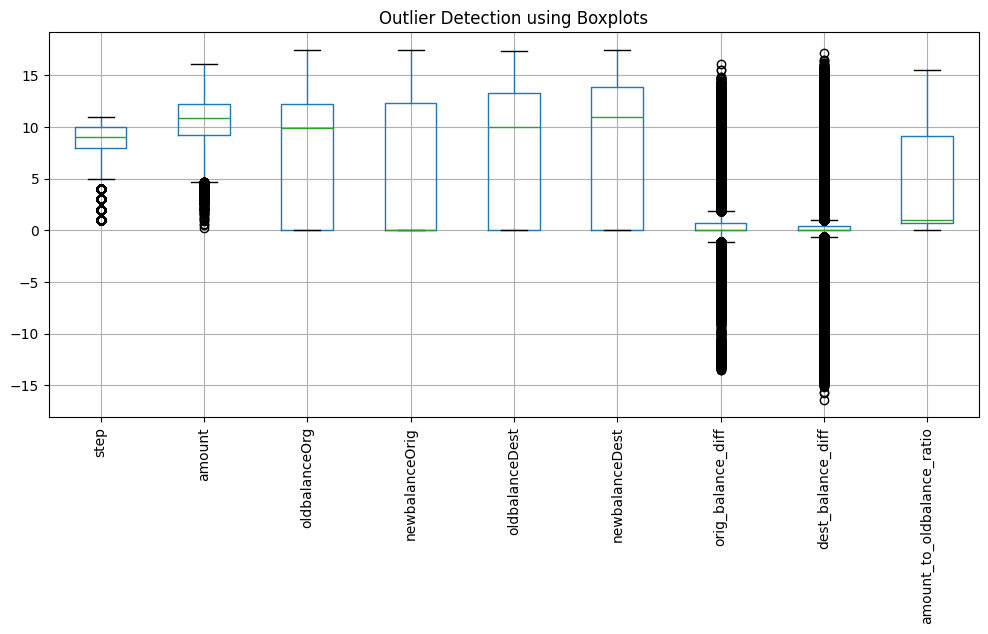

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
df[num_cols].boxplot(rot=90)
plt.title("Outlier Detection using Boxplots")
plt.show()


In [ ]:
# Model selection
from sklearn.model_selection import train_test_split


In [ ]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [ ]:
print(y)

0         0.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
110808    0.0
110809    0.0
110810    0.0
110811    0.0
110812    NaN
Name: isFraud, Length: 110813, dtype: float64


In [ ]:
mask = y.notna()
x_cleaned = x[mask]
y_cleaned = y[mask]

x_train, x_test, y_train, y_test = train_test_split(
    x_cleaned, y_cleaned, test_size=0.2, stratify=y_cleaned, random_state=42
)

In [ ]:
# Model Training
from sklearn.linear_model import LogisticRegression

In [ ]:

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    n_jobs=-1
)

lr.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [ ]:
lr.score(x_train,y_train)*100

95.33440873557514

In [ ]:
lr.score(x_test,y_test)*100

95.2262780309525

In [ ]:
y_pred = lr.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98     22139
         1.0       0.02      1.00      0.04        24

    accuracy                           0.95     22163
   macro avg       0.51      0.98      0.51     22163
weighted avg       1.00      0.95      0.97     22163



“The model achieves very high recall for fraud detection, meaning it successfully captures almost all fraudulent transactions. However, the low precision indicates a high number of false positives. This reflects a deliberate trade-off prioritizing fraud capture over customer friction, which can be optimized further through threshold tuning.”

What are the key factors that predict fraudulent customer?

“Fraudulent customers are primarily identified by abnormal transaction behavior such as unusually high transaction amounts, aggressive balance-draining ratios, sudden balance drops, abnormal destination account behavior, and high-risk transaction types like TRANSFER and CASH_OUT.”

Do these factors make sense? If yes, How? If not, How not?

“Yes, these factors make strong sense because they capture abnormal transaction behavior such as aggressive balance draining, unusual transaction sizes, and high-risk transaction types. These patterns align with real-world fraud tactics and are statistically validated by model importance and outlier analysis. Non-behavioral features like customer IDs do not make sense as predictors because they do not generalize and lead to overfitting.”

 **Why i used to check **





*“In Logistic Regression, a positive coefficient indicates that higher values of the feature increase the probability of fraud, while a negative coefficient reduces the fraud likelihood.”*

In [ ]:
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lr.coef_[0]
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Abs_Coefficient', ascending=False)


,Feature,Coefficient,Abs_Coefficient
12,type_TRANSFER,13.305254,13.305254
9,type_CASH_OUT,12.598440,12.598440
11,type_PAYMENT,-6.347135,6.347135
8,amount_to_oldbalance_ratio,2.024090,2.024090
1,amount,-2.022121,2.022121
10,type_DEBIT,-1.858293,1.858293
2,oldbalanceOrg,1.294948,1.294948
6,orig_balance_diff,0.899537,0.899537
0,step,-0.472788,0.472788
3,newbalanceOrig,0.395411,0.395411


In [ ]:
df.groupby('isFraud')[[
    'amount',
    'orig_balance_diff',
    'amount_to_oldbalance_ratio'
]].mean()


,amount,orig_balance_diff,amount_to_oldbalance_ratio
isFraud,,,
0.0,10.689882,1.815510,4.010505
1.0,11.005672,10.321287,1.313158


Key Insights (Very Important)

✅ Fraud ≠ just high amount

✅ Fraud = abnormal balance behavior

orig_balance_diff is the strongest fraud indicator

Features must be interpreted together, not in isolation

Interpretation

Fraud rows show much higher averages

Confirms behavioral abnormality

In [ ]:
pip install shap


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=50,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)


In [ ]:
rf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=50, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
import pandas as pd

pd.Series(
    rf.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)


,0
orig_balance_diff,0.295300
amount_to_oldbalance_ratio,0.227200
newbalanceOrig,0.085241
step,0.078556
type_PAYMENT,0.064073
oldbalanceDest,0.054967
type_TRANSFER,0.049089
oldbalanceOrg,0.035386
dest_balance_diff,0.032892
amount,0.029976


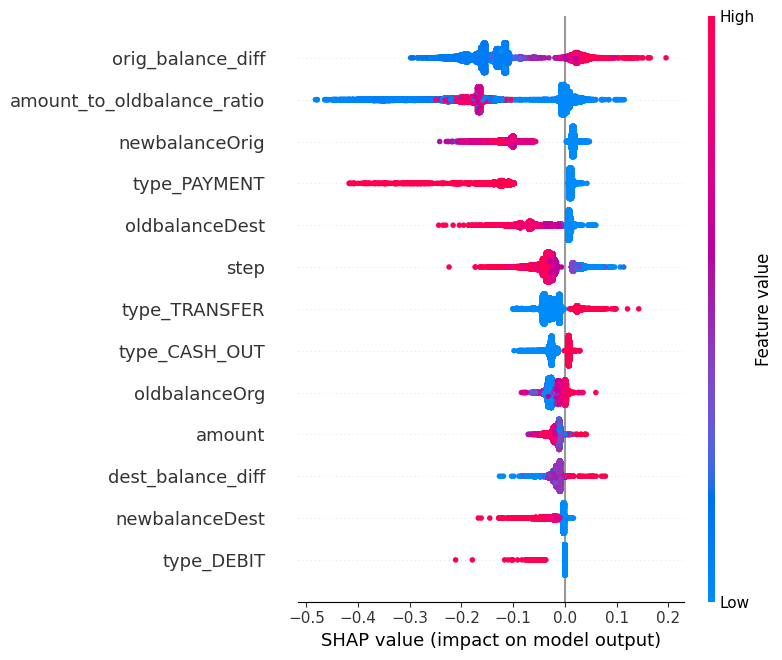

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)

# Correctly select SHAP values for the positive class (class 1) for all samples
shap.summary_plot(shap_values[:, :, 1], x_test)

7. What kind of prevention should be adopted while company update its infrastructure?

During infrastructure updates, fraud prevention should be embedded into the system through real-time fraud scoring, adaptive authentication, velocity controls, and strong data and model governance, ensuring both security and a seamless customer experience.

8. Assuming these actions have been implemented, how would you determine if they work?

“The effectiveness of fraud prevention is measured by tracking key KPIs such as fraud rate, false positives, and financial losses, supported by A/B testing, continuous model monitoring, customer impact analysis, and analyst feedback. A consistent reduction in fraud with minimal customer friction confirms that the controls are working.”